## Introduction to Monte Carlo 

Monte Carlo methods are methods for generating random variables directly 
or indirectly from a target distribution(s). Applications of monte carlo methods are in hypothesis testing and Bayesian computation.

- Monte Carlo is not strictly Bayesian

- Monte Carlo is not strictly frequentist (Neyman-Pearson hypothesis testing)

- Parametric sampling or parametric bootstrapping (target distribution part of a family of distributions)

- Monte Carlo methods are a method of statistical simulation. 

- Simulation can help us understand reality without needing to run multiple experiments or costly calculations. 

- Monte Carlo methods help us understand probabilities of extreme events.




## Simulation for p-values 

The use of Monte Carlo methods to calculate p-values has become popular. The reasons for this include the following:

1. many test statistics do not have a standard asymptotic distribution;

2. even if a standard asymptotic distribution does exist, it may not be reliable in realistic sample sizes; and 


In contrast, Monte Carlo methods can be used to obtain an empirical *p*-value that approximates the exact $p$ value without relying on asymptotic distributional theory or exhaustive enumeration.

North BV, Curtis D, Sham PC. A Note on the Calculation of Empirical P Values from Monte Carlo Procedures. 
*American Journal of Human Genetics*. 2002;71(2):439-441.



## Monte Carlo Hypothesis Testing

The contingency table below shows results of patients who underwent cancer treatment and either saw their cancer controlled or not. The two treatments are surgery and radiation. The question we are interested in is *is there a difference between treatment and controll of cancer*?

$H_0$: In the population, the two categorical variables are independent.
$H_A$: In the population, two categorical variables are dependent.


## R Code:

```{r}
    study = matrix(data = c(21, 2,
                            15, 3), nrow = 2, ncol = 2, byrow = TRUE,
                   dimnames = list(c("surgery", "radiation"),
                                   c("controlled", "not controlled")))

    print(study)
```


A Chi-squared test would usually be used for this type of analyses.


## Monte Carlo Hypothesis Testing, pt. 2 { .selectable }

There are two ways that the Chi-squared test is used:

1. to test the *Goodness of fit* of the theoretical distribution to the observations

2. testing for *independence* between different factors


$$
\chi^2 = \sum (O - E)^2 \big/ E
$$


To review the Chi-squared test and its assumptions, follow the [*link*](https://en.wikipedia.org/wiki/Pearson%27s_chi-squared_test#Assumptions)


## Monte Carlo Hypothesis Testing, pt. 3

A disadvantage of the Chi-squared test is that it requires a sufficient sample size in order for the chi-square approximation to be valid. When cell counts are low, say, below 5, asymptotic properties do not hold well. Therefore, a simple Chi-squred test may report an invalid *p*-value which would increase a [Type I error](http://support.minitab.com/en-us/minitab/17/topic-library/basic-statistics-and-graphs/hypothesis-tests/basics/type-i-and-type-ii-error/) rate.


In order to use Monte Carlo methods to solve this problem, we'll first need to set up some functions in `R`. We'll set up some code to generate our Chi-squared statistic and Monte Carlo *p*-value.



```{r, echo=TRUE}
    ## set up

    ## function will generate chi-squared statistics
    ## using the expected distribution of the data
    simulateChisq <- function(B, E, sr, sc){
        results = numeric(B)
        for(i in 1:B){
          ## review r2dtable documentation
            dat = unlist(r2dtable(1, sr, sc)) ## simulated contingency table
            M = matrix(dat, ncol = length(sc), nrow = length(sr))
            val = sum( sort( (M - E)^2 / E, decreasing = TRUE))
            results[i] = val
        }
        return(results)
    }

```

- [`r2dtable`](https://stat.ethz.ch/R-manual/R-devel/library/stats/html/r2dtable.html)

- [Random generation of a table ](http://people.sc.fsu.edu/~jburkardt/f_src/asa159/asa159.html)




## Monte Carlo Hypothesis Testing, pt. 5 


```{r, echo=TRUE}
    ChisqTest <- function(data, Simulations){
        x = data ## data
        B = Simulations ## number of simulations to generate
        n <- sum(x) ## total number of observations
        sr <- rowSums(x) ## sum of rows
        sc <- colSums(x) ## sum of cols
        E <- outer(sr, sc, "*")/n ## ORDER MATTERS
        dimnames(E) <- dimnames(study)
        tmp <- simulateChisq(B, E, sr, sc) ## simulated data
        Stat <- sum(sort((x - E)^2/E, decreasing = TRUE)) ## chi^2 statistic
        pval <- (1 + sum(tmp >=  Stat))/(B + 1) ## MC pvalue
        rawPVal = pchisq(q = Stat, df = 2, lower.tail = FALSE)
        out = list(PearsonStat = Stat,
                   MonteCarloPVal = pval,
                   rawPVal = rawPVal)
        return(out)
    }

```



## Monte Carlo Hypothesis Testing, pt. 6 

We then generate our test statistics.

```{r}

    #set.seed(123)

    results <- ChisqTest(study, 10000)

    print(results)

    ## compare against chisq.test()

```

## Monte Carlo Hypothesis Testing, pt. 7 

Our conclusion for the analysis is to accept (or fail to reject) the null hypothesis. We can conclude that treatment and control of cancer has some dependence/correlation.

You should compare these results against `R`'s `chisq.test` function.





## Inference on a single proportion

Here is an example taken from [*OpenIntro Statistics*](https://www.openintro.org/stat/textbook.php?stat_book=os) textbook.

A simple random sample of 1,028 US adults in March 2013 found that 56% support nuclear arms reduction. Does this provide convincing evidence that a majority of Americans supported nuclear arms reduction at the 5% significance level?

Using a Pearson-frequentist perspective, we might simply do the following: 

In a one-proportion hypothesis test, the success-failure condition is checked using the null proportion, which is $H_0: p = 0.5$ and 
$H_A: p > 0.5$.

Under the null hypothesis $n \times p = n \times (1-p) = 1028 \times 0.5 = 514 > 10$. With these conditions verified,
the normal model may be applied to $\hat{p}$.

Next the standard error can be computed. The null hypothesis $p_0 = 0.5$ is used again here,
because this is a hypothesis test for a single proportion.

$$
SE = \displaystyle \sqrt{\frac{p (1 - p)}{n}} = \sqrt{\frac{0.5 (1 - 0.5)}{1028}} = 0.016
$$

## Inference on a single proportion

Based on the normal model, the test statistic can be computed as
the Z-score of the point estimate:

$$
Z = \frac{\hat{p} - p_0}{SE} =  \frac{0.56 - 0.5}{0.016} = 3.75
$$

In [2]:
import numpy as np
from scipy import stats

In [ ]:
print(1 - pnorm(q = 3.75)) ## p-value

0.56 + c(-1,1)*1.96*0.016

In [11]:
p_val = 1 - stats.norm.cdf(x = 3.75)
print(p_val)

ci = 0.56 + np.array([-1,1])*1.96*0.016
print(ci)

8.84172852008e-05
[ 0.52864  0.59136]


We can then look up the upper tail area, the p-value, and see that it is less than 0.001. With a p-value < 0.05, we can reject the null hypothesis and conclude that the poll provides evidence that a majority (greater than 50%) of Americans supported the nuclear arms reduction efforst in March 2013.

- The 95% CI for $\hat{p} = 0.56$ is $(0.52864, 0.59136)$


## Bayesian Example 

Another perspective on this problem is that of a Bayesian. Let $p  = \theta$, where $\theta \sim Beta(1,1)$, then


$$
y | \theta \sim Bin(2430, \theta)
\
\text{ and }
\
\theta \sim Beta(1, 1)
\
$$

This is a binomial-beta data model problem. 

- $Beta(1,1)$ is equivalent to $Unif(0,1)$, this is a noninformative prior

- There is a beta prior distribution on $\theta$. 

- Beta is conjugate to the binomial distribution, see: [Conjugate priors](https://en.wikipedia.org/wiki/Conjugate_prior#Discrete_distributions). 

Bayesian anaysis uses prior information combined with observed data to update a probability distribution, posterior distribution, from which we can obtain a probability value. 

The new probability distribution, posterior, describes knowledge about the unkown parameter $\theta$ from historical beliefs (e.g. previous experiments, reports, etc.) and current observed data. We can then use this new probability distribution to create a 95% credible interval, where we assume that 

$$
P(l(\theta) \leq \theta \leq u(\theta)) = 0.95
$$


- [What's the difference between a confidence interval and a credible interval?](https://stats.stackexchange.com/questions/2272/whats-the-difference-between-a-confidence-interval-and-a-credible-interval)



## Bayesian Example, pt. 2 | Calculating the posterior distribution 

For $y \sim Bin(n, \theta)$ and $\theta \sim Beta(a,b)$ , 

$$
\begin{aligned}
\displaystyle p(\theta | y) & = \frac{f(y | \theta) \times p(\theta)}{ m(\mathbf{y})}  \\
\ & \propto f(y | \theta) \times p(\theta)   \\
\ & = \binom{n}{y} \theta^{y} (1 - \theta)^{n - y} \times \frac{\Gamma(a) \Gamma(b)}{\Gamma(a + b)} \theta^{a - 1} (1 - \theta)^{b - 1} \\
\ & \propto \theta^{y} (1 - \theta)^{n - y} \times  \theta^{a - 1} (1 - \theta)^{b - 1} \\
\ & \propto \theta^{(y + a) - 1} (1 - \theta)^{(n - y + b) -1 } \\
\ & \propto Beta(y + a, n - y + b) \\
\end{aligned}
$$
where $\displaystyle m(\mathbf{y}) = \int f(y | \theta) \times p(\theta) d \theta$.

## Bayesian Example, pt. 3 

The Bayesian data model is then 

$$
y | \theta \sim Bin(n, \theta)
\
and
\
\theta \sim Beta(a, b)
$$ 

The resulting posterior distribution is then
$$
\theta | y \sim Beta(y + a, n -y + b)
$$





## Bayesian Example, pt. 4 

We can now simulate the posterior distribution, then choose $\hat\theta =$ median, and take the 0.025 and 0.975 percentiles to form a 95% credible interval. We can conclude that the true probability lies between 53.00% and 59.05%, with median probability of 56.03%.


median: 0.560257651231
CI: [ 0.50340863  0.52365406]


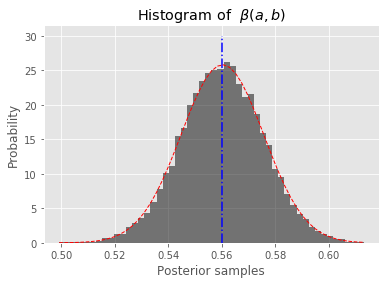

In [15]:
from scipy.stats import beta
import numpy as np
from numpy import random
import matplotlib.pyplot as plt 
import matplotlib.mlab as mlab

## set style
plt.style.use("ggplot") ## use plt.style.availalbe to see all styles

n = 10**4
a=576 + 1
b = 1028-576+1
random.seed(123)
x = random.beta(a=a, b = b, size=n)

# the histogram of the data
n, bins, patches = plt.hist(x, 50, normed=1, facecolor='black', alpha=0.5)

# add a 'best fit' line
y = beta.pdf(bins, a, b)
l = plt.plot(bins, y, 'r--', linewidth=1)

plt.xlabel('Posterior samples')
plt.ylabel('Probability')
plt.title(r'$\mathrm{Histogram\ of\ }\ \beta (a,b)$')
#plt.axis([40, 160, 0, 0.03])
plt.grid(True)
median = np.median(x)
plt.vlines(x = median, ymin = 0, ymax = 30, colors='blue', linestyle = 'dashdot')

CI = np.percentile(a = x, q = [0.025, 0.975]) ## 95% CI

print("median: " + str(median))
print("CI: " + str(CI))


plt.show()



## Monte Carlo Simulation 

The previous example focused on direct simulation from a posterior distribution that was well-defined. However, there are some posteriors that will not be as easily identifiable. In general, Monte Carlo methods will be helpful for generating samples from *difficult to sample* target distributions.

The next section will introduce topics of random number generation from target distributions through transformation methods.

